In [96]:
from prometheus_api_client import Metric, MetricsList, PrometheusConnect
from prometheus_api_client.utils import parse_datetime
from datetime import timedelta, datetime

import pandas as pd
import os

In [2]:
prom_url = "http://prometheus-k8s-openshift-monitoring.apps.ocp4.example.com/"
print("Prometheus uri: ", prom_url)

Prometheus uri:  http://prometheus-k8s-openshift-monitoring.apps.ocp4.example.com/


In [3]:
os.system("oc login -u user1 -p user1")
token = os.popen("oc whoami -t")
r_token = token.read()
print(r_token.rstrip())
pc = PrometheusConnect(url=prom_url, headers={"Authorization": "bearer " + r_token.rstrip()}, disable_ssl=True)

cXEH_OWCDJy0YANzMYQhv7IS8fytqYxFVXFIKChRRZk


In [39]:
pc.all_metrics()

/opt/app-root/lib/python3.6/site-packages/urllib3/connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'prometheus-k8s-openshift-monitoring.apps.ocp4.example.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/opt/app-root/lib/python3.6/site-packages/urllib3/connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'prometheus-k8s-openshift-monitoring.apps.ocp4.example.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


[':kube_pod_info_node_count:',
 ':node_memory_MemAvailable_bytes:sum',
 'ALERTS',
 'ALERTS_FOR_STATE',
 'aggregator_openapi_v2_regeneration_count',
 'aggregator_openapi_v2_regeneration_duration',
 'aggregator_unavailable_apiservice',
 'aggregator_unavailable_apiservice_count',
 'alertmanager_alerts',
 'alertmanager_alerts_invalid_total',
 'alertmanager_alerts_received_total',
 'alertmanager_build_info',
 'alertmanager_cluster_alive_messages_total',
 'alertmanager_cluster_enabled',
 'alertmanager_cluster_failed_peers',
 'alertmanager_cluster_health_score',
 'alertmanager_cluster_members',
 'alertmanager_cluster_messages_pruned_total',
 'alertmanager_cluster_messages_queued',
 'alertmanager_cluster_messages_received_size_total',
 'alertmanager_cluster_messages_received_total',
 'alertmanager_cluster_messages_sent_size_total',
 'alertmanager_cluster_messages_sent_total',
 'alertmanager_cluster_peer_info',
 'alertmanager_cluster_peers_joined_total',
 'alertmanager_cluster_peers_left_total'

In [107]:
start_time = parse_datetime("3d")
end_time = parse_datetime("now")
chunk_size = timedelta(days=3)

In [108]:
mem_metric_data = pc.get_metric_range_data(
    "container_memory_rss{namespace='default'}",  # this is the metric name and label config
    start_time=start_time,
    end_time=end_time,
    chunk_size=chunk_size,
)

mem_metrics_object_list = MetricsList(mem_metric_data)
    
mem_metric_object = mem_metrics_object_list[0] # one of the metrics from the list

mem_metric_object_chunk_list = []
for raw_metric in mem_metric_data:
    mem_metric_object_chunk_list.append(Metric(raw_metric))

print(mem_metric_object.metric_values.y)

/opt/app-root/lib/python3.6/site-packages/urllib3/connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'prometheus-k8s-openshift-monitoring.apps.ocp4.example.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/opt/app-root/lib/python3.6/site-packages/urllib3/connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'prometheus-k8s-openshift-monitoring.apps.ocp4.example.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


0       4214784
1       4214784
2       4214784
3       4214784
4       4214784
         ...   
8626    4214784
8627    4214784
8628    4214784
8629    4214784
8630    4214784
Name: y, Length: 8631, dtype: int64


In [109]:
cpu_metric_data = pc.get_metric_range_data(
    "namespace:container_cpu_usage:sum{namespace='default'}",  # this is the metric name and label config
    start_time=start_time,
    end_time=end_time,
    chunk_size=chunk_size,
)
cpu_metrics_object_list = MetricsList(cpu_metric_data)
    
cpu_metric_object = cpu_metrics_object_list[0] # one of the metrics from the list

cpu_metric_object_chunk_list = []
for raw_metric in cpu_metric_data:
    cpu_metric_object_chunk_list.append(Metric(raw_metric))


/opt/app-root/lib/python3.6/site-packages/urllib3/connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'prometheus-k8s-openshift-monitoring.apps.ocp4.example.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/opt/app-root/lib/python3.6/site-packages/urllib3/connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'prometheus-k8s-openshift-monitoring.apps.ocp4.example.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


In [110]:
network_metric_data = pc.get_metric_range_data(
    "container_network_transmit_bytes_total{namespace='default'}",  # this is the metric name and label config
    start_time=start_time,
    end_time=end_time,
    chunk_size=chunk_size,
)
network_metrics_object_list = MetricsList(network_metric_data)
    
network_metric_object = network_metrics_object_list[0] # one of the metrics from the list

network_metric_object_chunk_list = []
for raw_metric in network_metric_data:
    network_metric_object_chunk_list.append(Metric(raw_metric))
print(network_metric_object.metric_values.y)

/opt/app-root/lib/python3.6/site-packages/urllib3/connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'prometheus-k8s-openshift-monitoring.apps.ocp4.example.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/opt/app-root/lib/python3.6/site-packages/urllib3/connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'prometheus-k8s-openshift-monitoring.apps.ocp4.example.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


0       36349897
1       36350165
2       36350433
3       36350835
4       36350969
          ...   
8627    51442047
8628    51442985
8629    51443655
8630    51446047
8631    51446851
Name: y, Length: 8632, dtype: int64


In [111]:
ini_df = pd.DataFrame(data = cpu_metric_object.metric_values)
ini_df.rename(columns = {"y": "cpu"}, inplace=True)
ini_df['mem'] = mem_metric_object.metric_values.y
ini_df['network'] = network_metric_object.metric_values.y
ini_df

,ds,cpu,mem,network
0,2020-10-25 20:01:36.661999941,0.001493,4214784.0,36349897.0
1,2020-10-25 20:02:06.661999941,0.001481,4214784.0,36350165.0
2,2020-10-25 20:02:36.661999941,0.001484,4214784.0,36350433.0
3,2020-10-25 20:03:06.661999941,0.001480,4214784.0,36350835.0
4,2020-10-25 20:03:36.661999941,0.001474,4214784.0,36350969.0
...,...,...,...,...
8635,2020-10-28 19:59:06.661999941,0.002956,NaN,NaN
8636,2020-10-28 19:59:36.661999941,0.002608,NaN,NaN
8637,2020-10-28 20:00:06.661999941,0.002603,NaN,NaN
8638,2020-10-28 20:00:36.661999941,0.002594,NaN,NaN


In [112]:
sec_df = ini_df[['ds', 'cpu', 'mem', 'network']].dropna(axis=0)
sec_df

,ds,cpu,mem,network
0,2020-10-25 20:01:36.661999941,0.001493,4214784.0,36349897.0
1,2020-10-25 20:02:06.661999941,0.001481,4214784.0,36350165.0
2,2020-10-25 20:02:36.661999941,0.001484,4214784.0,36350433.0
3,2020-10-25 20:03:06.661999941,0.001480,4214784.0,36350835.0
4,2020-10-25 20:03:36.661999941,0.001474,4214784.0,36350969.0
...,...,...,...,...
8626,2020-10-28 19:54:36.661999941,0.006213,4214784.0,51441377.0
8627,2020-10-28 19:55:06.661999941,0.006175,4214784.0,51442047.0
8628,2020-10-28 19:55:36.661999941,0.006047,4214784.0,51442985.0
8629,2020-10-28 19:56:06.661999941,0.005569,4214784.0,51443655.0


In [120]:
def get_date(y, m, d):
  s = f'{y:04d}-{m:02d}-{d:02d}'
  return datetime.strptime(s, '%Y-%m-%d')

def get_week_no(df):
    y = int(df['ds'].year)
    m = int(df['ds'].month)
    d = int(df['ds'].day)
    target = get_date(y,m,d)
    firstday = target.replace(day=1)
    if firstday.weekday() == 6:
        origin = firstday
    elif firstday.weekday() < 3:
        origin = firstday - timedelta(days=firstday.weekday() + 1)
    else:
        origin = firstday + timedelta(days=6-firstday.weekday())
    return (target - origin).days // 7 + 1

sec_df['weekly'] = sec_df.apply(get_week_no, axis=1)
sec_df

,ds,cpu,mem,network,weekly
0,2020-10-25 20:01:36.661999941,0.001493,4214784.0,36349897.0,4
1,2020-10-25 20:02:06.661999941,0.001481,4214784.0,36350165.0,4
2,2020-10-25 20:02:36.661999941,0.001484,4214784.0,36350433.0,4
3,2020-10-25 20:03:06.661999941,0.001480,4214784.0,36350835.0,4
4,2020-10-25 20:03:36.661999941,0.001474,4214784.0,36350969.0,4
...,...,...,...,...,...
8626,2020-10-28 19:54:36.661999941,0.006213,4214784.0,51441377.0,4
8627,2020-10-28 19:55:06.661999941,0.006175,4214784.0,51442047.0,4
8628,2020-10-28 19:55:36.661999941,0.006047,4214784.0,51442985.0,4
8629,2020-10-28 19:56:06.661999941,0.005569,4214784.0,51443655.0,4


In [119]:
cpu_first_data = sec['cpu'][-1:] - ini_df['cpu'][2875]
cpu_first_data

8639    0.001177
Name: cpu, dtype: float64

In [115]:
table_weekly = pd.pivot_table(ini_df, values = ['cpu', 'mem', 'network'], index=['weekly'], aggfunc = np.mean)
table_weekly

,cpu,mem,network
weekly,,,
4,0.003434,4214784.0,3.985896e+07


In [121]:
fake_metric_data = {
    'weekly': [1,2,3,4],
    'cpu': [0.124,0.123, 0.17, 0.19],
    'mem': [234213142,5552423, 7513246, 8646534],
    'network': [312432.2134, 123111.8321, 123332.8321, 123556.8321]
}

In [122]:
fake_metric_df = pd.DataFrame(fake_metric_data)
fake_metric_df

,weekly,cpu,mem,network
0,1,0.124,234213142,312432.2134
1,2,0.123,5552423,123111.8321
2,3,0.170,7513246,123332.8321
3,4,0.190,8646534,123556.8321


In [123]:
fake_metric_df = fake_metric_df.set_index('weekly')
fake_metric_df

,cpu,mem,network
weekly,,,
1,0.124,234213142,312432.2134
2,0.123,5552423,123111.8321
3,0.170,7513246,123332.8321
4,0.190,8646534,123556.8321


In [18]:
gen_weekly_data = table_weekly.append(fake_metric_df)
gen_weekly_data = gen_weekly_data.sort_index()
gen_weekly_data

,cpu,mem,network
weekly,,,
1,0.00652,4947968.0,4.287458e+07
2,0.12000,5555555.0,1.111832e+03
3,0.17000,7513246.0,1.332832e+03
4,0.19000,8646534.0,1.556832e+03


In [19]:
from reportlab.platypus import SimpleDocTemplate
from reportlab.lib.pagesizes import letter

In [20]:
fileName = 'pdfTable.pdf'

pdf = SimpleDocTemplate(fileName,pagesize=letter)

In [21]:
from reportlab.graphics.charts.piecharts import (
	Pie
)
from reportlab.graphics.charts.legends import (
	Legend
)
from reportlab.lib.validators import Auto

In [22]:
def getPieChart(data1, data2, data3):
	data = [data1, data2, data3]
	chart = Pie()
	chart.data = data
	chart.x = 50
	chart.y = 5

	chart.labels = ['cpu_cost','mem_cost','net_cost']

	chart.sideLabels = True

	chart.slices[0].fillColor = colors.red
	#chart.slices[0].popout = 8

	title = String(
		50, 110, 
		'Cost ratio', 
		fontSize = 12
	)	

	legend = Legend()
	legend.x = 220
	legend.y = 80
	legend.alignment = 'right' 	

	legend.colorNamePairs = Auto(obj=chart)

	drawing = Drawing(0, 500)
	drawing.add(title)
	drawing.add(chart)
	drawing.add(legend)

	return drawing

In [23]:
from reportlab.graphics.charts.linecharts import(
	HorizontalLineChart
)

def getLineChart(title, data, data_max):
	chart = HorizontalLineChart()
	chart.data = data
	chart.x = 5
	chart.y = 5
	chart.height = 100
	chart.width = 150

	chart.categoryAxis.categoryNames = [
		'week_1', 'week_2', 'week_3', 'week_4'
	]

	title = String(
		35, 120, 
		title +' usage per week', 
		fontSize = 12
	)	
#cpu y axis range
	chart.valueAxis.valueMin = 0
	chart.valueAxis.valueMax = data_max
	chart.valueAxis.valueStep = round(data_max,2)/5
	chart.lines[0].strokeWidth = 3.5
	chart.lines[0].strokeColor = colors.purple

	drawing = Drawing(170, 450) 
	drawing.add(title)
	drawing.add(chart)
	return drawing

In [24]:
def get_table(dataframe):
    table_fig = plt.figure(figsize=(9,2))
    ax = plt.subplot(111)
    ax.axis('off')
    ax.table(cellText=dataframe.values, colLabels=dataframe.columns, bbox=[0,0,1,1])
    return table_fig

In [25]:
from reportlab.graphics.shapes import Drawing
from reportlab.lib import colors
from reportlab.platypus import Table
from reportlab.graphics.shapes import String

In [26]:
import matplotlib.pyplot as plt

In [27]:
cpu_title = 'cpu'
mem_title = 'mem'
net_title = 'net'

cpu_data = [tuple(x for x in gen_weekly_data["cpu"].values.tolist())]
mem_data = [tuple(x for x in gen_weekly_data["mem"].values.tolist())]
net_data = [tuple(x for x in gen_weekly_data["network"].values.tolist())]

In [28]:
#metric value max
cpu_max = max(cpu_data[0])
mem_max = max(mem_data[0])
net_max = max(net_data[0])

#metric value sum
cpu_sum = sum(cpu_data[0]) * 10000
mem_sum = sum(mem_data[0]) / 10000
net_sum = sum(net_data[0])

In [29]:
#total cost
total_sum = round(cpu_sum + mem_sum + net_sum)

pieChart = getPieChart(cpu_sum, mem_sum, net_sum)
cpu_lineChart = getLineChart(cpu_title, cpu_data, cpu_max)
mem_lineChart = getLineChart(mem_title, mem_data, mem_max)
net_lineChart = getLineChart(net_title, net_data, net_max)

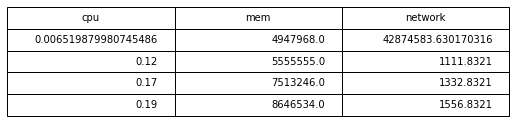

In [40]:
dataframe_fig = get_table(gen_weekly_data)

dataframe_fig.savefig('dataframe.png')

#chart 위치
table = Table([
	[cpu_lineChart,mem_lineChart,net_lineChart]
], 190, 200)

pie_table = Table([
	[pieChart]
], 550, 350)

In [41]:
table.setStyle([
	#('INNERGRID',(0,0),(-1,-1),1,colors.white),
	("VALIGN",(0,0),(-1,-1),"BOTTOM"),
    ("ALIGN",(0,0),(-1,-1),"CENTER"),	
])

pie_table.setStyle([
	('INNERGRID',(0,0),(-1,-1),1,colors.transparent),
	("VALIGN",(0,0),(-1,-1),"BOTTOM"),
    ("ALIGN",(0,0),(-1,-1),"LEFT"),	
])

In [42]:
elems = []
elems.extend([table, pie_table])
pdf.build(elems)

In [43]:
from PyPDF2 import PdfFileWriter, PdfFileReader
import io

In [44]:
import datetime
import calendar

In [45]:
now = datetime.datetime.today()
month = calendar.month_name[now.month]

In [46]:
from reportlab.pdfgen import canvas

In [48]:
pdf_data = io.BytesIO()
# create a new PDF with Reportlab
pdf_canvas = canvas.Canvas(pdf_data, pagesize=letter)
# 제목
pdf_canvas.setFont('Helvetica', 20)
pdf_canvas.drawString(200,725,month+" Cloud Usage Bill")
# 가격 산정 제목
pdf_canvas.setFont('Helvetica', 18)
pdf_canvas.drawString(330,270,"< Price Calculation Method >")

pdf_canvas.setFont('Helvetica', 9)
# CPU 가격 산정 방식
pdf_canvas.drawString(350,240,"CPU: sum of container cpu usage, dollar per 0.1")
# Memory 가격 산정 방식
pdf_canvas.drawString(350,220,"Memory: container memory RSS, dollar per MB")
# Network 가격 산정 방식
pdf_canvas.drawString(350,200,"Network: container network transmit bytes total, dollar per MB")

pdf_canvas.setFont('Helvetica', 18)
pdf_canvas.drawString(350,100,"total cost :  " + str(total_sum) + "won")

#draw image
pdf_canvas.drawImage('logo.png', x=70, y=30, width=90, height=60)
pdf_canvas.drawImage('dataframe.png', x=-20, y=300, width=648, height=144)
pdf_canvas.save()

os.system("rm -rf logo.png dataframe.png")

0